## Download the kaggle dataset and put it in ./data/

[Dataset](https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset/download?datasetVersionNumber=1)

In [1]:
import zipfile
import os
import shutil

zip_location = './data/archive.zip'
extract_to = './data/'

with zipfile.ZipFile(zip_location, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


os.remove("./data/archive.zip")
shutil.rmtree('./data/OriginalDataset') 


FileNotFoundError: [Errno 2] No such file or directory: './data/archive.zip'

In [4]:
import tensorflow as tf
from tensorflow import keras
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [53]:
# Importing the dataset
data = tf.keras.preprocessing.image_dataset_from_directory('./data/AugmentedAlzheimerDataset/', 
	labels='inferred', 
	label_mode='int', 
	image_size=(256, 256), 
	batch_size=32, 
	shuffle=True, 
	seed=42, 
	validation_split=0.2, 
	subset='training', 
	interpolation='bilinear',
)

print("Class Names: ", data.class_names)
print("Training Data Size: ", data.cardinality().numpy())
print("Training Data Shape: ", data.element_spec)

Found 33984 files belonging to 4 classes.
Using 27188 files for training.
Class Names:  ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
Training Data Size:  850
Training Data Shape:  (TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [25]:
for image_batch, labels_batch in data.take(1):
		print("image_batch shape: {}, labels_batch shape: {}".format(image_batch.shape, labels_batch.shape))

image_batch shape: (32, 224, 224, 3), labels_batch shape: (32,)


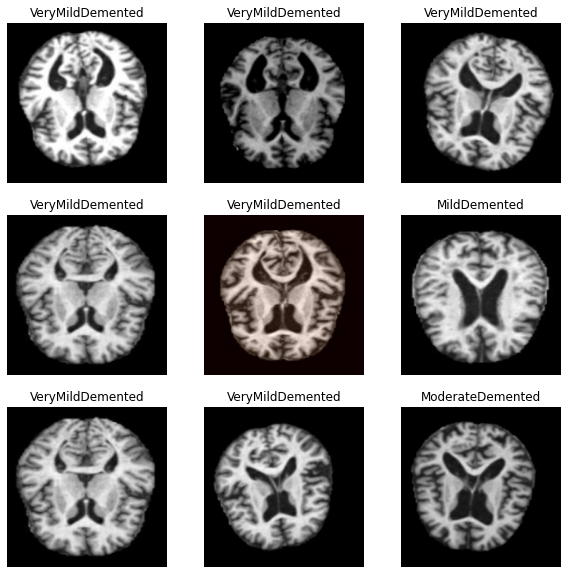

In [29]:
# Show the first 8 images and labels from the training set
textLabels = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Randomly select 9 images from the training set
randomImages = np.random.randint(0, image_batch.shape[0], size=9)

plt.figure(figsize=(10, 10))

for i in range(0,9):
    plt.subplot(3, 3, i+1)
    plt.imshow(image_batch[randomImages[i]].numpy().astype("uint8"))
    plt.title(textLabels[labels_batch[randomImages[i]]])
    plt.axis("off")




In [9]:
import math
# Create the training/test split 80/20
train_ds = data.take(math.floor(0.8 * len(data)))
test_ds = data.skip(math.ceil(0.8 * len(data)))

# Print the sizes of the training/test sets
print("Training set size: ", len(train_ds))
print("Test set size: ", len(test_ds))

Training set size:  849
Test set size:  212


In [40]:
MobileNetV3Small = keras.applications.MobileNetV3Small(
	input_shape=(224, 224, 3),
	include_top=False, 
	weights='imagenet')

# Create the model

model = keras.Sequential()

for layer in MobileNetV3Small.layers[:-5]:
	layer.trainable = False

model.add(MobileNetV3Small)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(1, activation='softmax'))


In [41]:
# Compile the model

model.compile(
	optimizer=keras.optimizers.Adam(learning_rate=0.0001),
	metrics=['accuracy'],
	loss='binary_crossentropy',
)

# Train the model
model.fit(train_ds, epochs=5, validation_data=test_ds)


Epoch 1/5
173/849 [=====>........................] - ETA: 14:35 - loss: -1.1568 - accuracy: 0.1897

KeyboardInterrupt: 

In [ ]:
# Create a new model from scratch

model = keras.Sequential([
	keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
	keras.layers.MaxPooling2D(),
	keras.layers.Conv2D(64, 3, activation='relu'),
	keras.layers.MaxPooling2D(),
	keras.layers.Flatten(),
	keras.layers.Dense(128, activation='relu'),
	keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'])
history = model.fit(train_ds,
    steps_per_epoch=len(train_ds),
    validation_data=test_ds,
    validation_steps=len(test_ds),
    epochs=10)

Epoch 1/10
409/849 [=============>................] - ETA: 6:38 - loss: -421888458752.0000 - accuracy: 0.1921

In [ ]:
# Show the model history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.show()